# **PART 1**

imports

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import math
from skimage.feature import peak_local_max

Loading image from google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
image_path = '/content/gdrive/MyDrive/Team/vision/assignment1/old_man.png'

Mounted at /content/gdrive


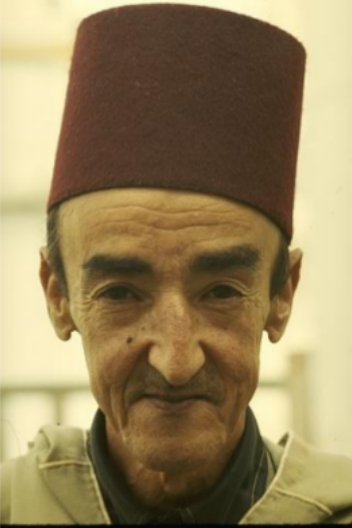

In [ ]:
img = cv2.imread(image_path)
cv2_imshow(img)

Converting from BGR format to Grayscale as Laplacian filters use grayscale images


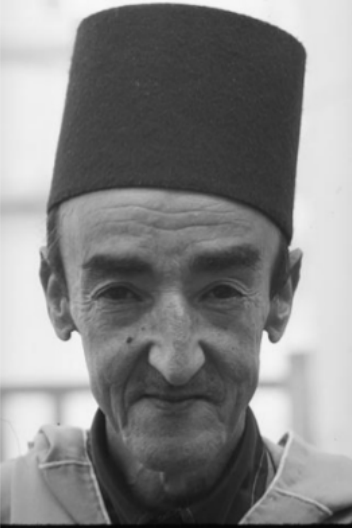

In [ ]:
gray_img = cv2.cvtColor(img, code=cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

 Noise Reduction Using Median Filter

- Using k = 3     Almost no difference

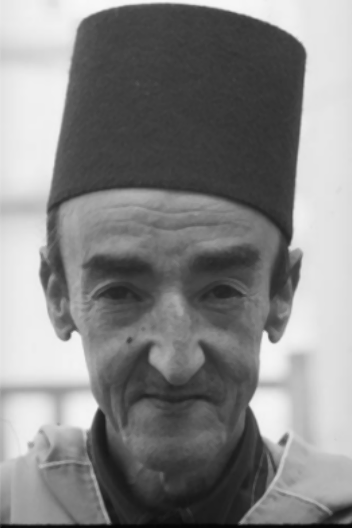

In [ ]:
blurred_img_3 = cv2.medianBlur(gray_img, ksize=3)
cv2_imshow(blurred_img_3)

- Using k = 5 a slight blurring

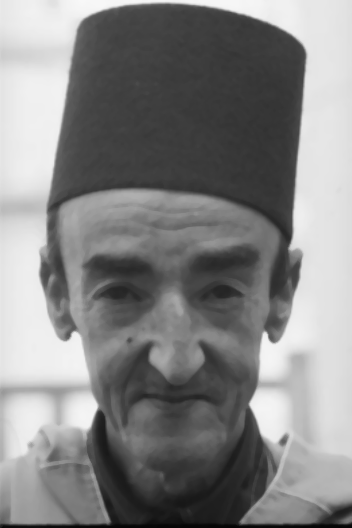

In [ ]:
blurred_img_5 = cv2.medianBlur(gray_img, ksize=5)
cv2_imshow(blurred_img_5)

- Using k = 7 more blurred

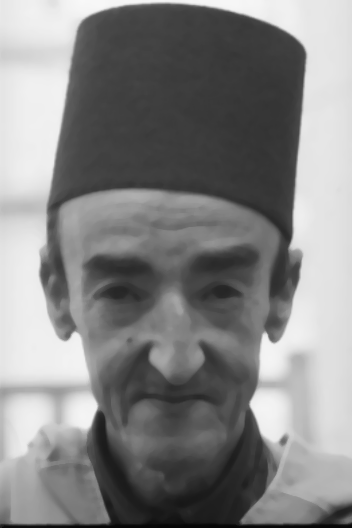

In [ ]:
blurred_img_7 = cv2.medianBlur(gray_img, ksize=7)
cv2_imshow(blurred_img_7)

- Using k = 9  way too blurred

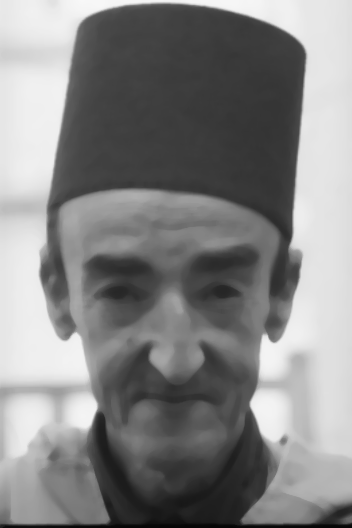

In [ ]:
blurred_img_9 = cv2.medianBlur(gray_img, ksize=9)
cv2_imshow(blurred_img_9)

 Edge Detection Using Laplacian Filter(Using the k = 7 blurred image)

- Using k = 3 some edges not visible

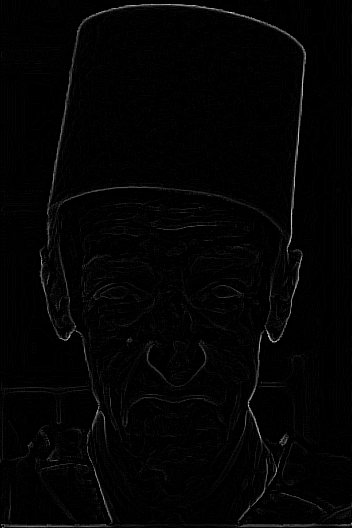

In [ ]:
img_Laplacian_3 = cv2.Laplacian(blurred_img_7, cv2.CV_8U, ksize=3)
cv2_imshow(img_Laplacian_3)

### - Using k = 5 

using blurred image with k = 5 in median filter

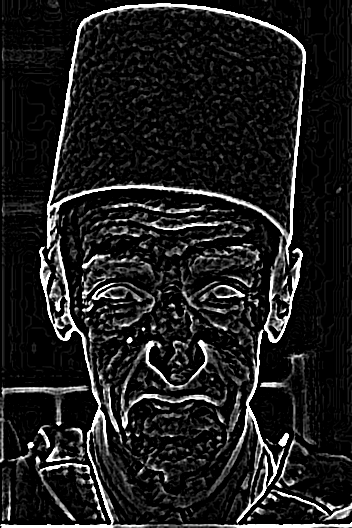

In [ ]:
img_Laplacian_5 = cv2.Laplacian(blurred_img_5, cv2.CV_8U, ksize=5)
cv2_imshow(img_Laplacian_5)

using blurred image with k = 7 in median filter (less noise than with k = 5 in median filter)

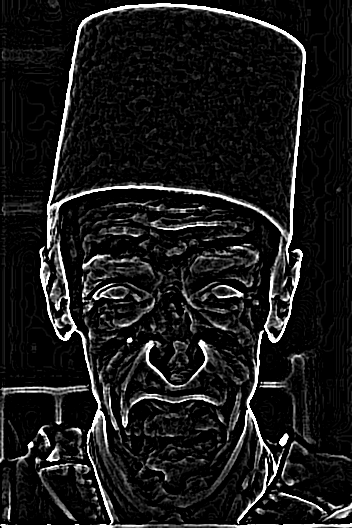

In [ ]:
img_Laplacian_final = cv2.Laplacian(blurred_img_7, cv2.CV_8U, ksize=5)
cv2_imshow(img_Laplacian_final)

- Using k = 7

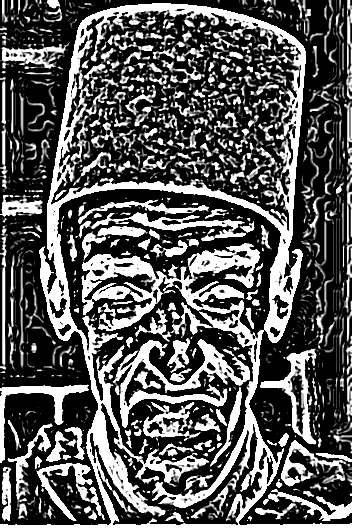

In [ ]:
img_Laplacian_7_7 = cv2.Laplacian(blurred_img_7, cv2.CV_8U, ksize=7)
cv2_imshow(img_Laplacian_7_7)

Applying a binary threshold to make the edges either white or black

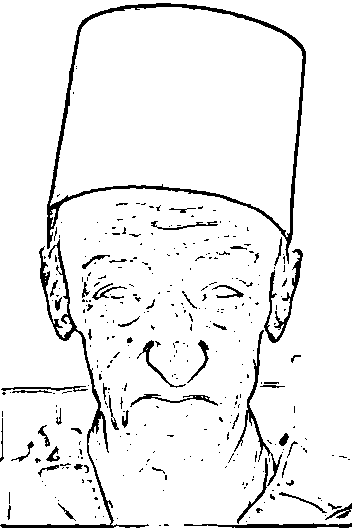

(528, 352)


In [ ]:
threshold, thresholded_img = cv2.threshold(img_Laplacian_final, 127, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(thresholded_img)
print(thresholded_img.shape) # image is now 2d array and there is no channels

converting grey image into BGR 

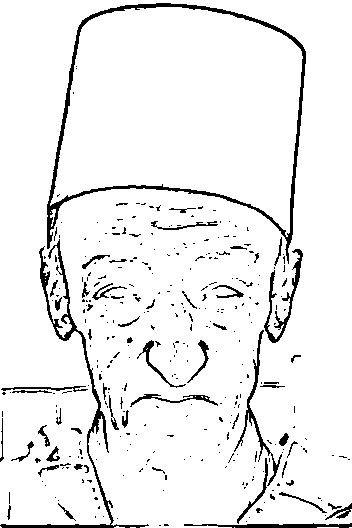

(528, 352, 3)


In [ ]:
thresholded_img_BGR = cv2.cvtColor(thresholded_img, cv2.COLOR_GRAY2BGR)
cv2_imshow(thresholded_img_BGR)
print(thresholded_img_BGR.shape)

### Generating a color painting and a cartoon using bilateral filter

bilateralFilter	(	InputArray 	src,
OutputArray 	dst,
int 	d,
double 	sigmaColor,
double 	sigmaSpace,
int 	borderType = BORDER_DEFAULT 
)


- sigmaColor:	Filter sigma in the color space. A larger value of the parameter means that farther colors within the pixel neighborhood (see sigmaSpace) will be mixed together, resulting in larger areas of semi-equal color.
- sigmaSpace:	Filter sigma in the coordinate space. A larger value of the parameter means that farther pixels will influence each other as long as their colors are close enough (see sigmaColor ). When d>0, it specifies the neighborhood size regardless of sigmaSpace. Otherwise, d is proportional to sigmaSpace.
- d: Diameter of each pixel neighborhood that is used during filtering. If it is non-positive, it is computed from sigmaSpace.

## Using multiple small filters instead of just 1

### applying the filter 3 times

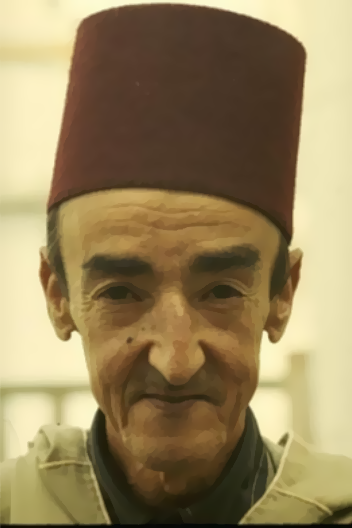

In [ ]:
smoothed_img_1 = img
for i in range(3):
  smoothed_img_1 = cv2.bilateralFilter(smoothed_img_1, d = 9, sigmaColor = 9, sigmaSpace = 9)

cv2_imshow(smoothed_img_1)


cartoonified image

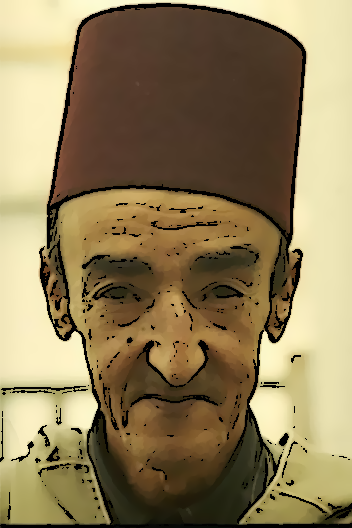

In [ ]:
cartoonified_image = cv2.bitwise_and(smoothed_img_1, thresholded_img_BGR)
cv2_imshow(cartoonified_image)

### applying the filter  times

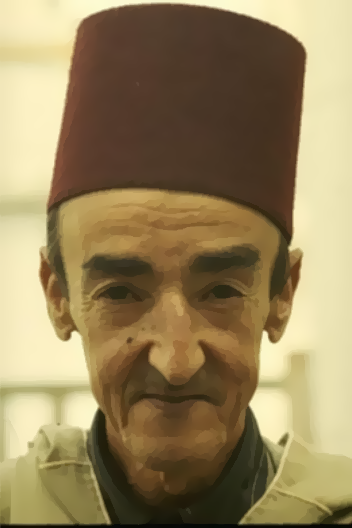

In [ ]:
smoothed_img_2 = img
for i in range(5):
  smoothed_img_2 = cv2.bilateralFilter(smoothed_img_2, d = 9, sigmaColor = 9, sigmaSpace = 9)

cv2_imshow(smoothed_img_2)


cartoonified image

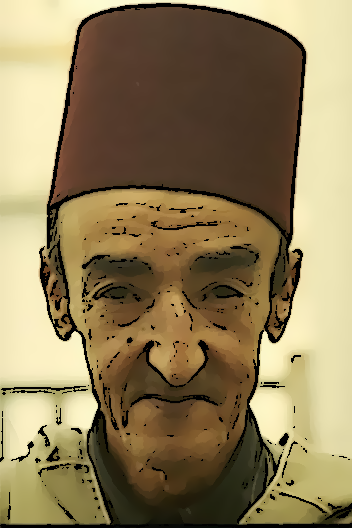

In [ ]:
cartoonified_image_2 = cv2.bitwise_and(smoothed_img_2, thresholded_img_BGR)
cv2_imshow(cartoonified_image_2)

## Creating a Cartoonify method to test

In [ ]:
#  using values for k we found best during the assignment
def cartoonify(img_path):
  img = cv2.imread(img_path)
  gray_img = cv2.cvtColor(img, code=cv2.COLOR_BGR2GRAY)
  blurred_img = cv2.medianBlur(gray_img, ksize=7)
  img_Laplacian = cv2.Laplacian(blurred_img, cv2.CV_8U, ksize=5)
  threshold, thresholded_img = cv2.threshold(img_Laplacian, 127, 255, cv2.THRESH_BINARY_INV)
  thresholded_img_BGR = cv2.cvtColor(thresholded_img, cv2.COLOR_GRAY2BGR)
  smoothed_img = img
  for i in range(3):
    smoothed_img = cv2.bilateralFilter(smoothed_img, d = 9, sigmaColor = 9, sigmaSpace = 9)

  cartoonified_image = cv2.bitwise_and(smoothed_img, thresholded_img_BGR)
  cv2_imshow(cartoonified_image)


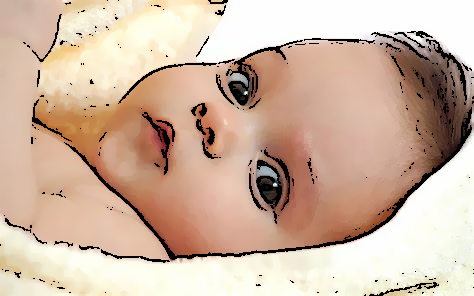

In [ ]:
cartoonify('/content/gdrive/MyDrive/Team/vision/assignment1/baby.jpg')

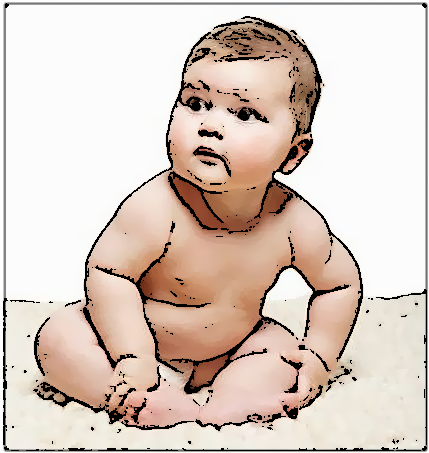

In [ ]:
cartoonify('/content/gdrive/MyDrive/Team/vision/assignment1/baby1.jpg')

# **PART 2: Road Lane Detection Using Hough Transform**

Load the image

*   List item

---


*   List item



(704, 1279, 3)


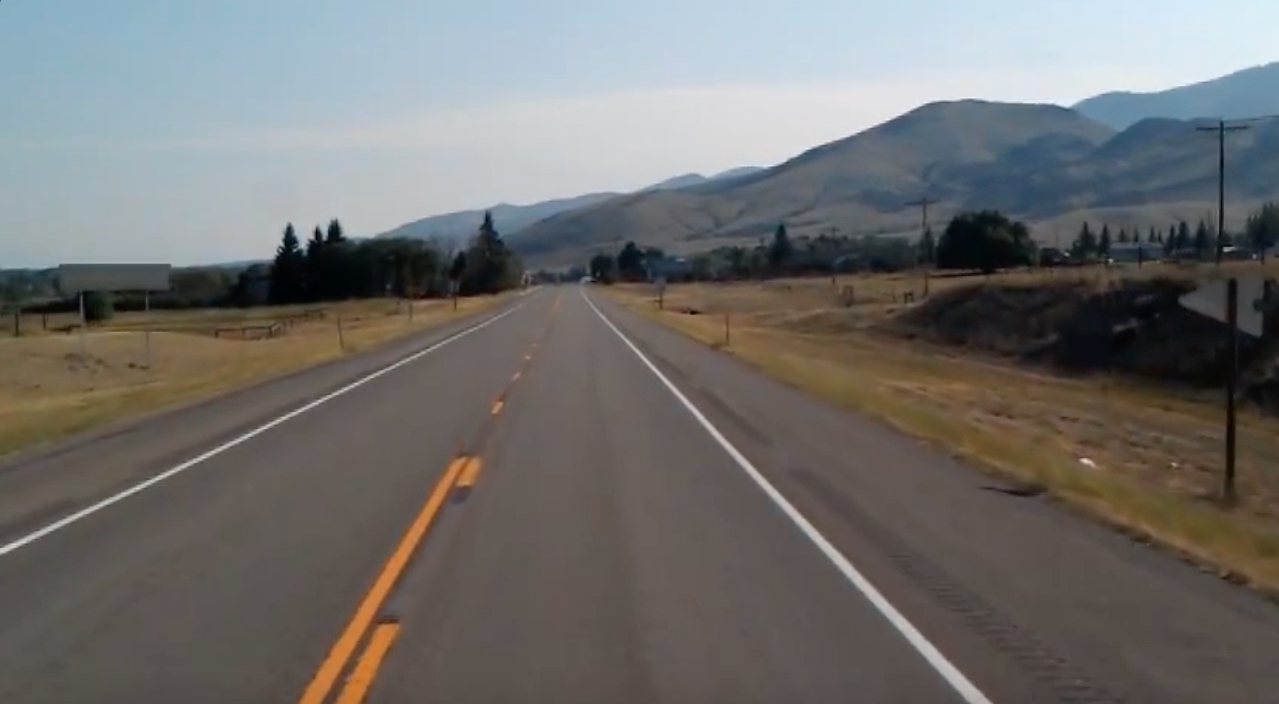

In [ ]:
road_img_path = '/content/gdrive/MyDrive/Team/vision/assignment1/testHough.jpg'
road_img = cv2.imread(road_img_path)
print(road_img.shape)
cv2_imshow(road_img)

Converting image to grayscale for faster processing

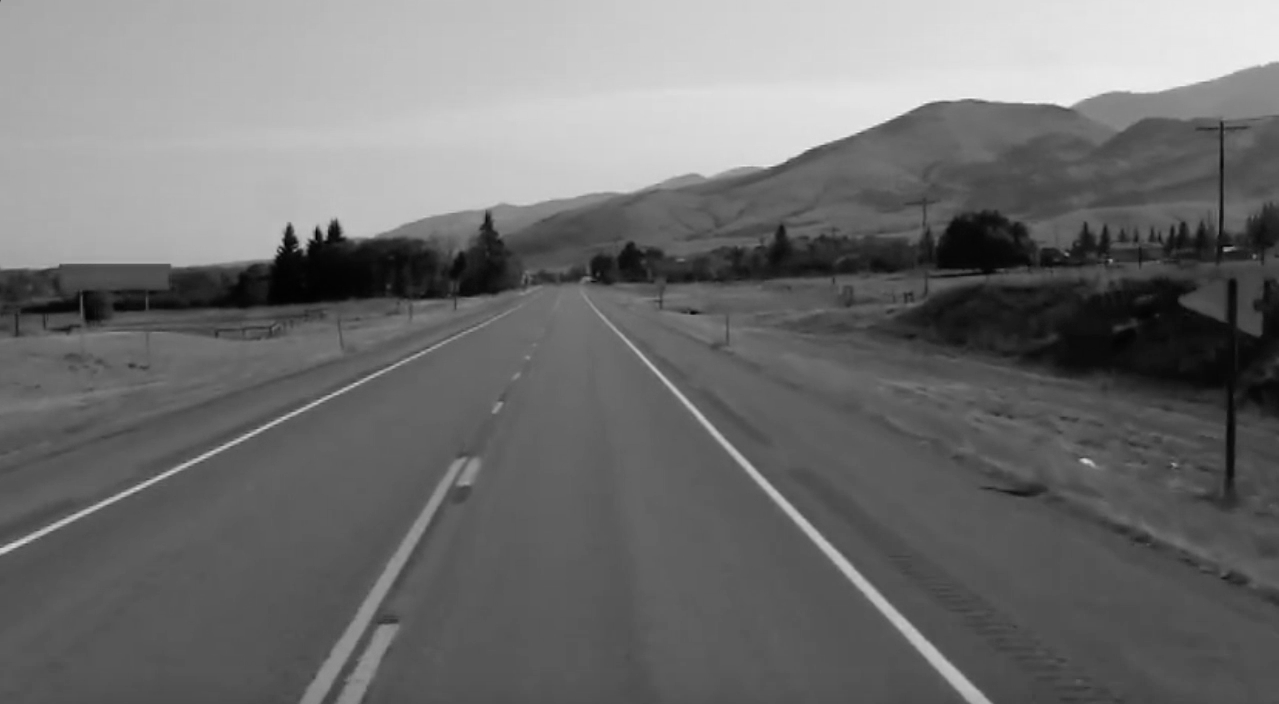

In [ ]:
gray_road_img = cv2.cvtColor(road_img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_road_img)

Smoothing the image

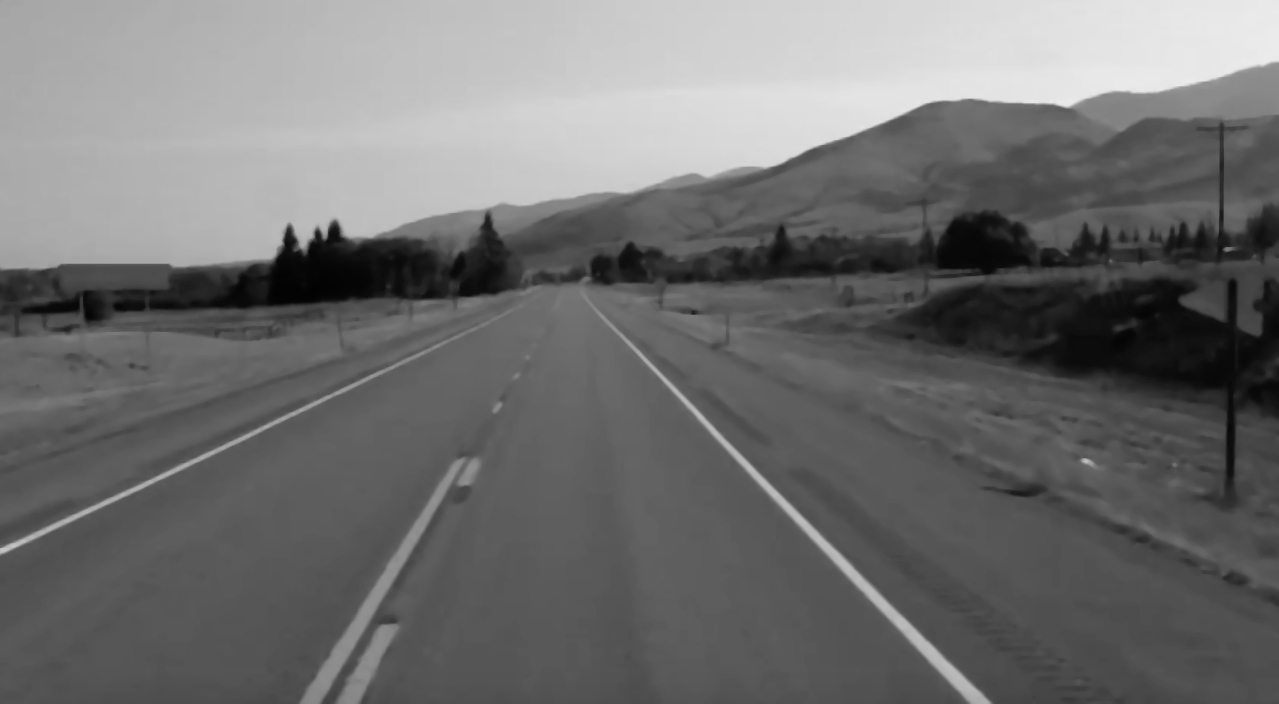

In [ ]:
blurred_road_img = cv2.medianBlur(gray_road_img, ksize=5)
cv2_imshow(blurred_road_img)

Edge Detection using Canny’s algorithm

 If the gradient is larger than the upper threshold, then it is identified as an edge pixel. If it's below the lower threshold, it gets rejected. The gradient between the thresholds is accepted only when it is connected to a strong edge.

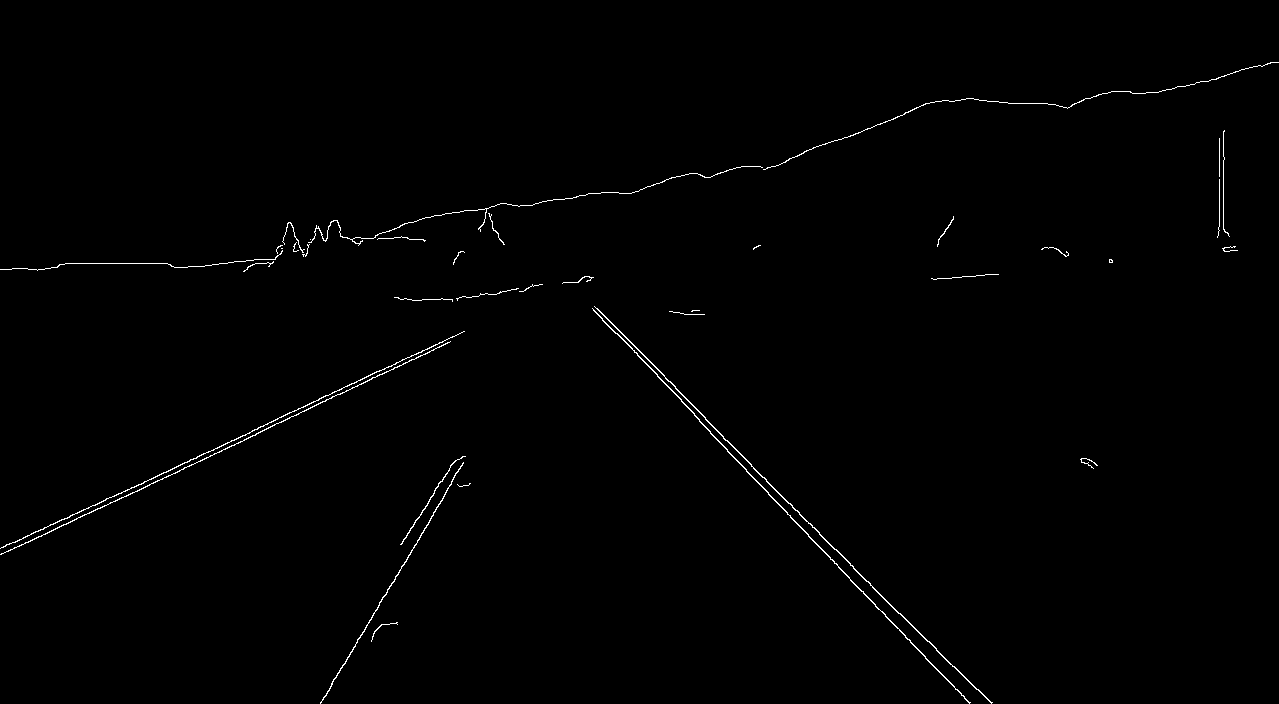

In [ ]:
canny_road_img = cv2.Canny(blurred_road_img, 100, 200)
cv2_imshow(canny_road_img)

Region Of Interest


we use matplotlib library to spot the coordinates and isolate that region

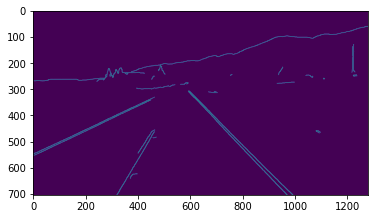

In [ ]:
plt.imshow(canny_road_img)
plt.show()

Getting the polygon

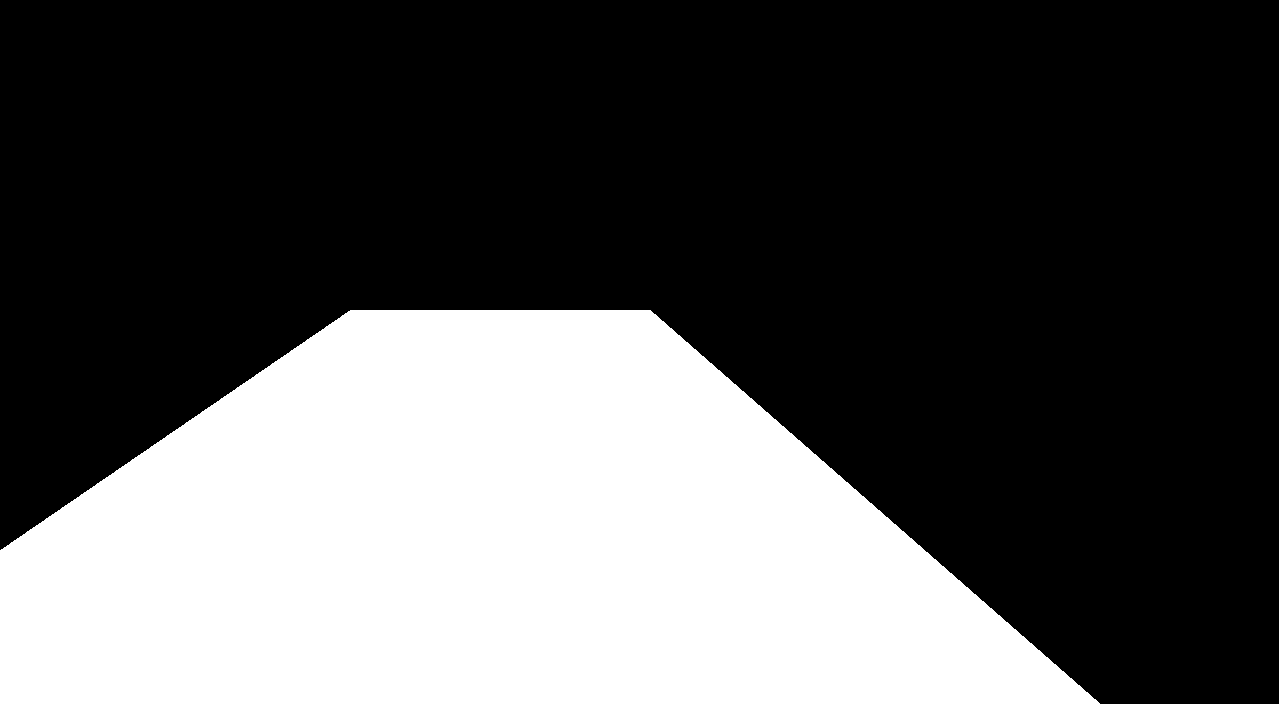

In [ ]:
height = road_img.shape[0]
polygons = np.array([
    [(0,height), (1100, height), (650, 310), (350, 310),(0, 550),]
    ])
mask = np.zeros_like(canny_road_img)
cv2.fillPoly(mask, polygons, 255)
cv2_imshow(mask)

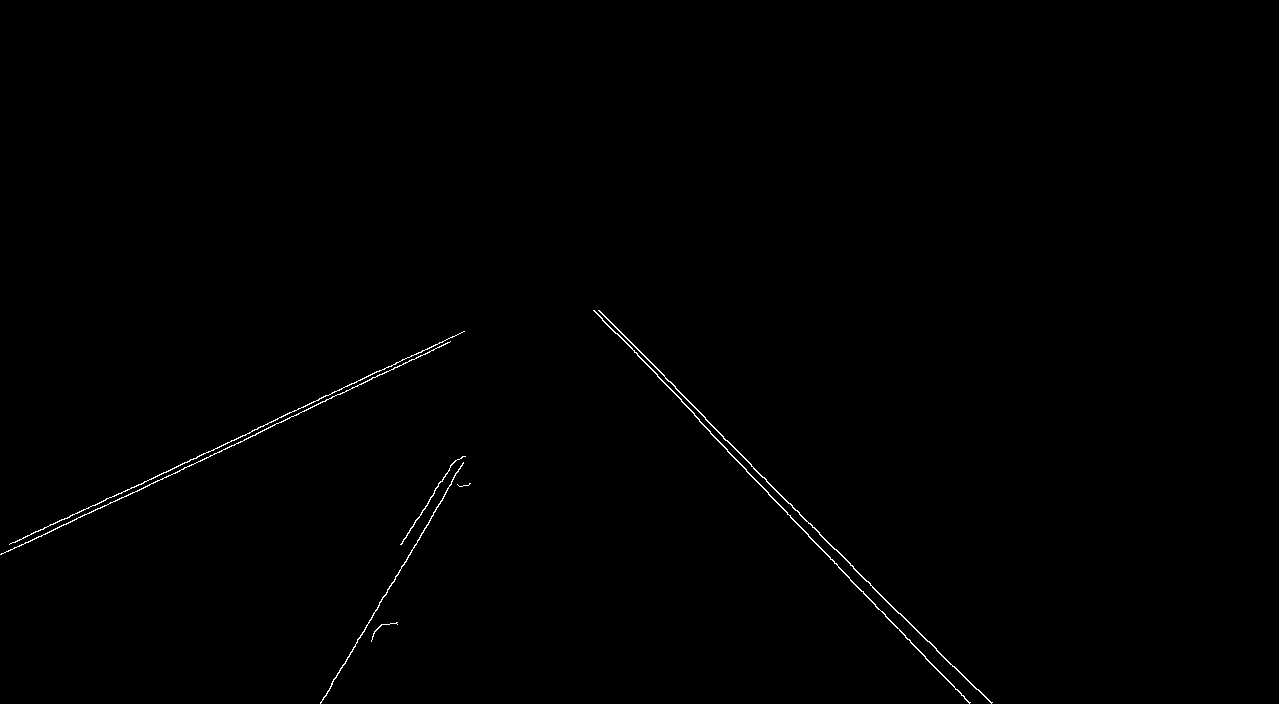

In [ ]:
masked_road_img = cv2.bitwise_and(canny_road_img, mask)
cv2_imshow(masked_road_img)

# **Hough Transform**

we are looking for theta and p that has maximum votes which represents the line that all the points on an edge pass throw [aka the edge]
- theta is from 0 to 180 [181 value] as from 180 to 360 the intersections represent the same line .
- as for p it's from -image_diagonal to image_diagonal as we don't want the negative values we will add image_diagonal to all values that mean p range is from 0 to image_diagonal


In [ ]:
def Hough(img):
  thetas = np.deg2rad(np.arange(0, 180))
  width,height = img.shape
  cosines = np.cos(thetas)
  sines = np.sin(thetas)
  print(img.shape)
  y_edge,x_edge = np.nonzero(img) 
  rho_values = np.empty((len(y_edge), len(thetas)))

  diag_length = np.ceil(np.sqrt(width*width + height*height))
  diag_length = int(diag_length)
  rhos = np.linspace(-diag_length, diag_length, diag_length * 2)
  print(diag_length)

  accumulator = np.zeros((diag_length*2,len(thetas)))
  print(accumulator.shape)
  for i in range(len(x_edge)):

    for theta in range(len(thetas)) :
       rho = round((x_edge[i] * cosines[theta]) + (y_edge[i] * sines[theta])) + diag_length
       rho_values[i, theta] = rho - diag_length
       accumulator[rho,theta] += 1

  return accumulator, thetas,rhos,rho_values


(704, 1279)
1460
(2920, 180)


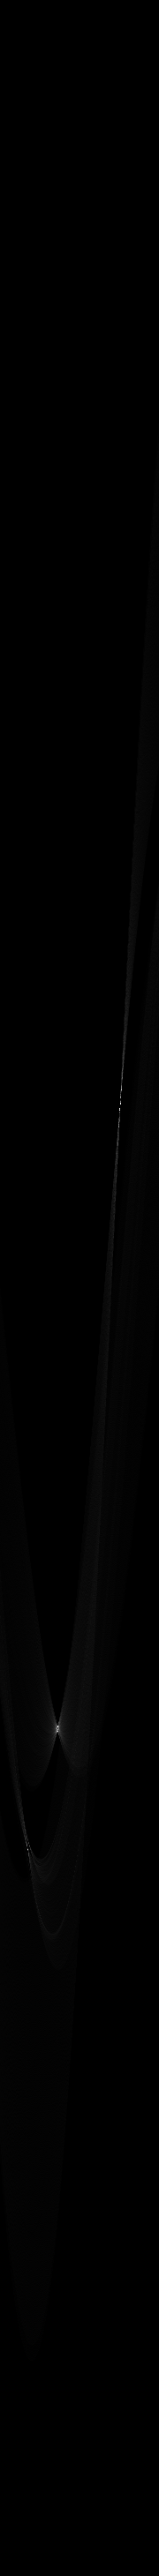

In [ ]:
acc, thetas,rhos ,rho_values= Hough(masked_road_img)
cv2_imshow(acc)

In [ ]:
indicies = peak_local_max(acc, min_distance=20,num_peaks=3, threshold_rel=0.2)
print(indicies)

[[1258  135]
 [1957   65]
 [2096   31]]


In [ ]:
def hough_lines_draw(img, indicies, rhos, thetas):
    black_img = np.zeros_like(img)
    for i in range(len(indicies)):
        # reverse engineer lines from rhos and thetas
        rho = rhos[indicies[i][0]]
        theta = thetas[indicies[i][1]]
        cos = np.cos(theta)
        sin = np.sin(theta)
        x = cos*rho
        y = sin*rho
        # these are then scaled so that the lines go off the edges of the image
        x1 = int(x + 1500*(-sin))
        y1 = int(y + 1500*(cos))
        x2 = int(x - 1500*(-sin))
        y2 = int(y - 1500*(cos))

        cv2.line(black_img, (x1, y1), (x2, y2), (255, 255, 0), 5)
    return black_img

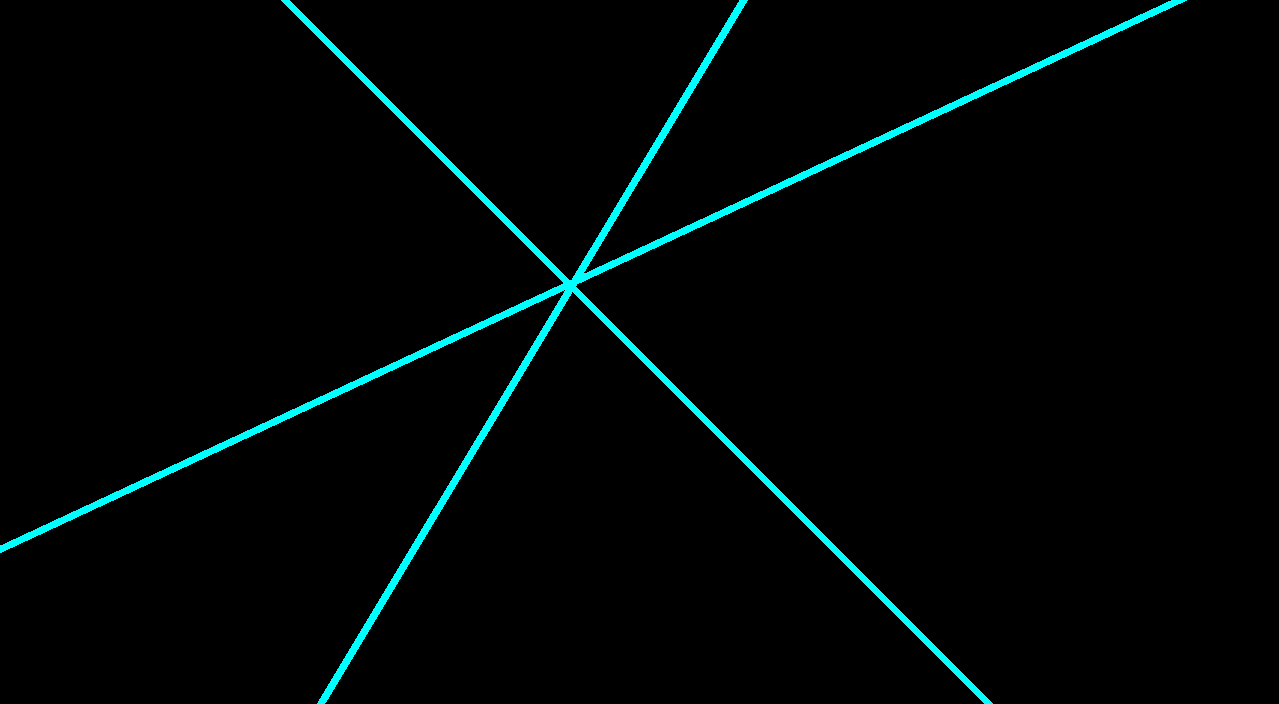

In [ ]:
edges = hough_lines_draw(road_img, indicies, rhos, thetas)
cv2_imshow(edges)

## now masking the edges to get only the region of interest

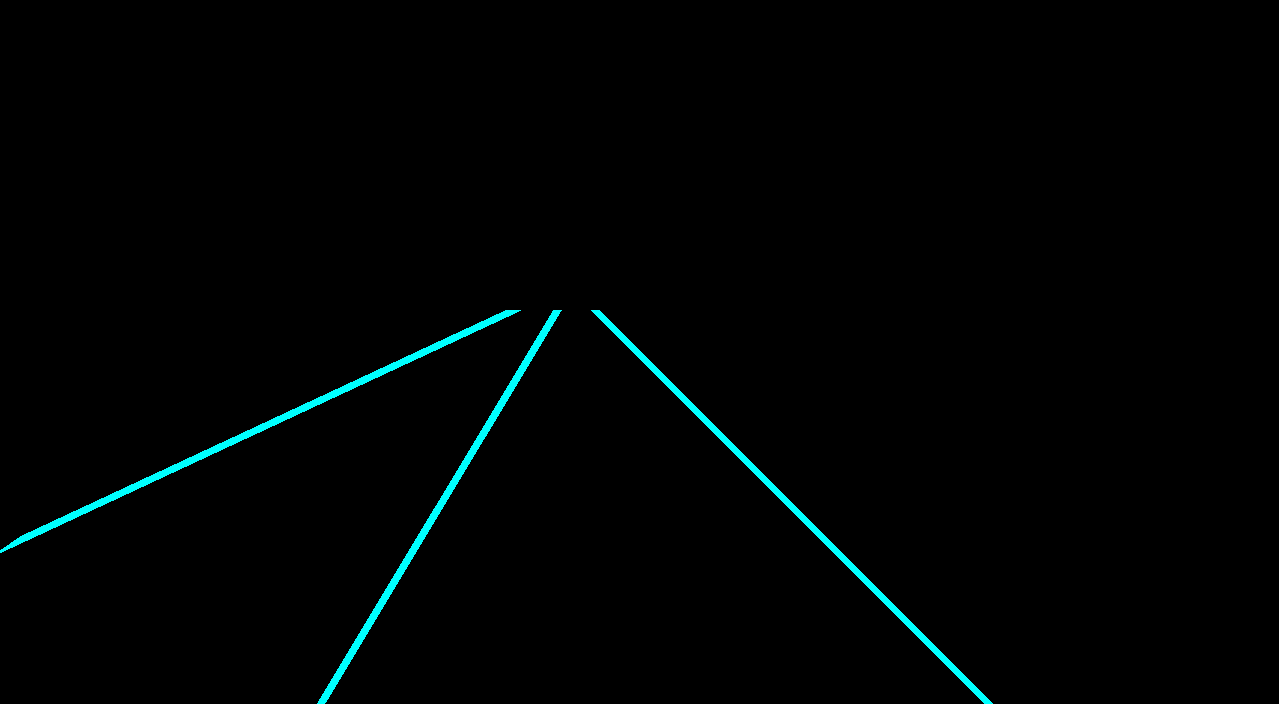

In [ ]:
masked_img = cv2.bitwise_and(edges, cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR))
cv2_imshow(masked_img)

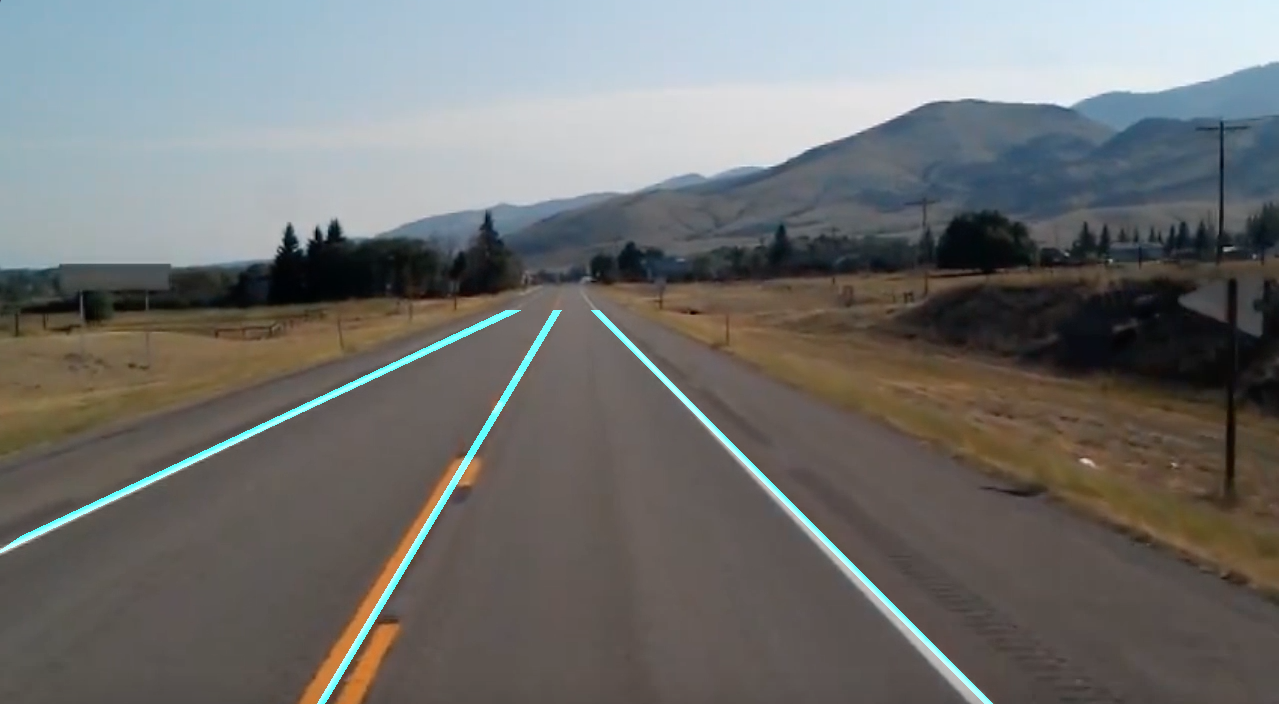

In [ ]:
final_img = cv2.bitwise_or(masked_img , road_img)
cv2_imshow(final_img)

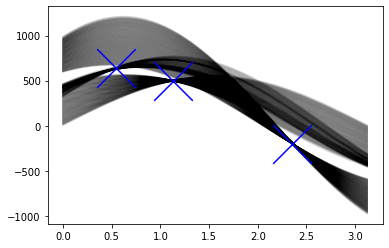

In [ ]:
for rho in rho_values:
  plt.plot(thetas, rho, color = 'black', alpha = 0.01)

for i in range(len(indicies)):
      # reverse engineer lines from rhos and thetas
      rho = rhos[indicies[i][0]]
      theta = thetas[indicies[i][1]]
      plt.scatter([theta], [rho], marker='x',color="blue",s=1500,zorder=1500)
plt.show()

# **Testing**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
road_img_path = '/content/gdrive/MyDrive/Team/vision/assignment1/testHough1.png'

Mounted at /content/gdrive


In [ ]:
def imageMasking(img):
  gray_road_img = cv2.cvtColor(road_img, cv2.COLOR_BGR2GRAY)
  blurred_road_img = cv2.medianBlur(gray_road_img, ksize=5)
  canny_road_img = cv2.Canny(blurred_road_img, 100, 200)
  #plt.imshow(canny_road_img)
  #plt.show()
  height = road_img.shape[0]
  polygons = np.array([
    [(0,height), (852, height),(852,450), (550, 340), (280, 320),(0, 450),]
    ])
  mask = np.zeros_like(canny_road_img)
  cv2.fillPoly(mask, polygons, 255)
  return mask ,canny_road_img 

In [ ]:
def hough_lines_draw2(img, indicies, rhos, thetas):
    black_img = np.zeros_like(img)
    for i in range(len(indicies)):
        # reverse engineer lines from rhos and thetas
        rho = rhos[indicies[i][0]]
        theta = thetas[indicies[i][1]]
        cos = np.cos(theta)
        sin = np.sin(theta)
        x = cos*rho
        y = sin*rho
        # these are then scaled so that the lines go off the edges of the image
        x1 = int(x + 2500*(-sin))
        y1 = int(y + 2500*(cos))
        x2 = int(x - 2500*(-sin))
        y2 = int(y - 2500*(cos))

        cv2.line(black_img, (x1, y1), (x2, y2), (255, 255, 0), 3)
    return black_img

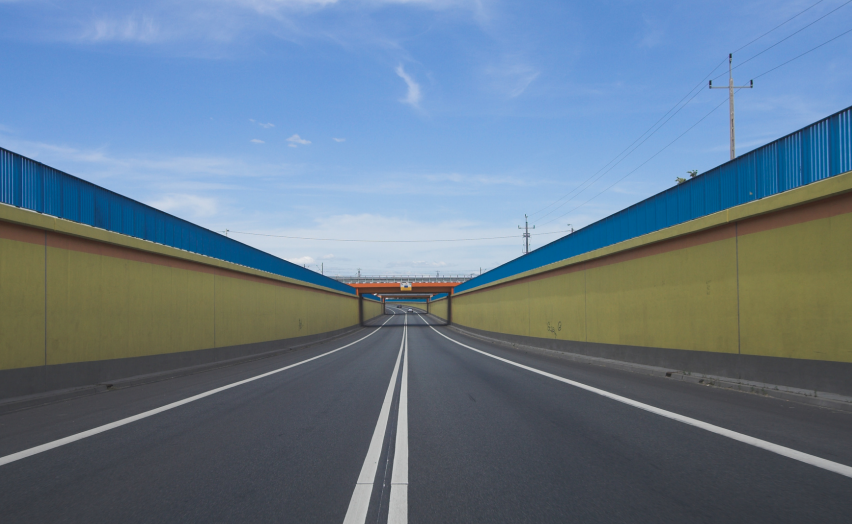

In [ ]:
road_img = cv2.imread(road_img_path)
cv2_imshow(road_img)

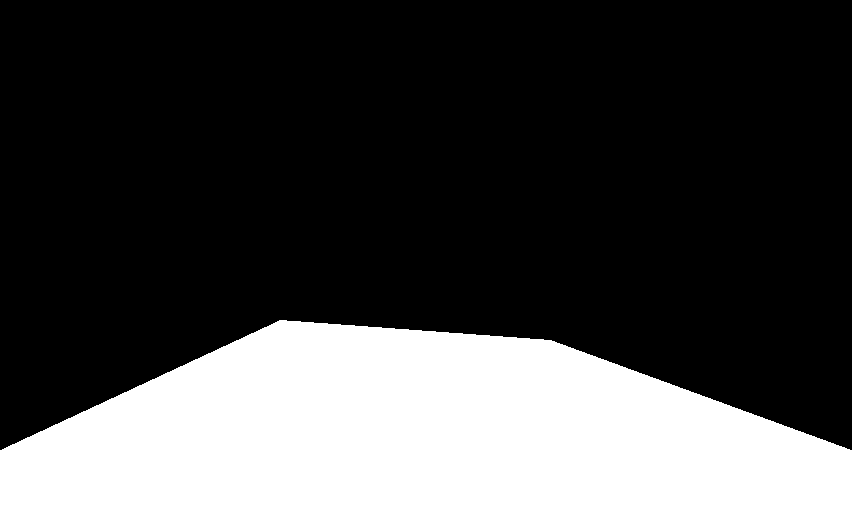

In [ ]:
mask ,canny_road_img = imageMasking(road_img)
cv2_imshow(mask)

In [ ]:
masked_road_img = cv2.bitwise_and(canny_road_img, mask)
cv2_imshow(masked_road_img)

In [ ]:
acc, thetas,rhos ,rho_values= Hough(masked_road_img)
#cv2_imshow(acc)

indicies = peak_local_max(acc, min_distance=17,num_peaks=4, threshold_rel=0.2)
print(indicies)

edges = hough_lines_draw2(road_img, indicies, rhos, thetas)
#cv2_imshow(edges)

masked_img = cv2.bitwise_and(edges, cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR))
cv2_imshow(masked_img)

final_img = cv2.bitwise_or(masked_img , road_img)
cv2_imshow(final_img)

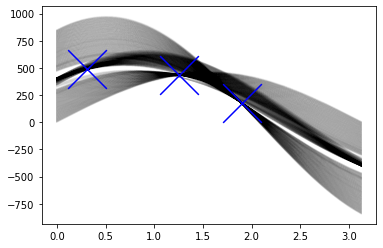

In [ ]:
for rho in rho_values:
  plt.plot(thetas, rho, color = 'black', alpha = 0.01)

for i in range(len(indicies)):
      # reverse engineer lines from rhos and thetas
      rho = rhos[indicies[i][0]]
      theta = thetas[indicies[i][1]]
      plt.scatter([theta], [rho], marker='x',color="blue",s=1500,zorder=1500)
plt.show()